# **Behavioral Cloning** 

The goal of this project is to use data/images from a simulator of a car on a track inorder to build a model that will mimic the stearing decisions of the data to drive around the track in the simulator.

This project had two parts that I did iteratively:

    1.  Collect Data From the Simulator provided by Udacity
    2.  Train a Network to Predict Steering 

## Data Collection

I drove the car around the center of the tracking twice, in both directions.  I then spent 1 lap creating data where the car was near the edge of either side of the road and their corrected to return to the center of the road.

When training the data I found that the car would leave the track at the dirt turnout, so I created 10 recordings of turning sharply to avoid the turnout.

In creating a training set I used all 3 images with a 0.2 correcton on the left/right images, and flipped the images and the steering angle.  This lead to ~120k images for training and validating the network.


## Network Architecture and Training



I implemented an architecture **similar** to the Nvidia Architecture from their 2016 paper: [End to End Learning for Self-Driving Cars](https://arxiv.org/pdf/1604.07316.pdf).  It consistented of data normalization and corpping followed by 6 2D Convolutional layers that square kernels of size (5,5,5,5,3,3) and of depths (3,24,36,48,64,64), followed by Dense Layers of (100,50,10,1) that finally predicted the steering angle of the car.  I used an Adam optimizer to train the network with a 80/20 traing/validation split. 

## Results

The video this github repo shows that the car made it around the track.  I have tested it several times and have let the car drive around a little over 2 laps in a row without any mistakes.   

What is interesting to me is that overfitting, in this case, actually improved the ability to drive on the first track.   Despit the validation loss staying relatively flat as increasing the number of epochs, models trained with 2 epochs did not have the car complete 1 loop.  Models trained with 5 epochs sometimes, but not always completed 1 loop.  Models trained with 10 epochs almost always completed 1 loop.   It seems for cloning a behavior in a controlled envirement, overfitting can be useful.

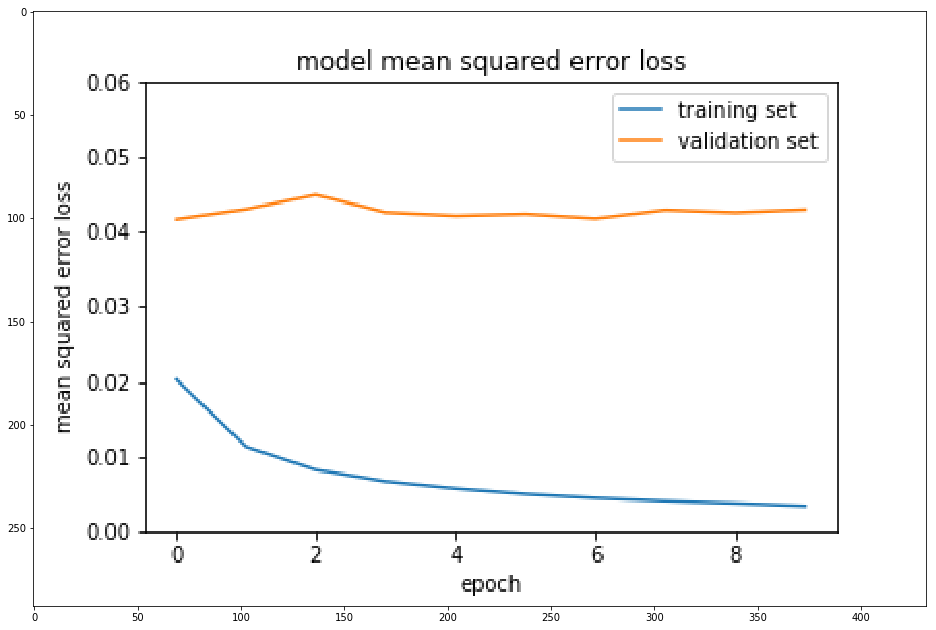

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,12))
val = cv2.cvtColor(cv2.imread('validation.png'),cv2.COLOR_BGR2RGB)
plt.imshow(val)
plt.show()

Obviously, this is not a desirable path if the simulator had unpredictable elements or inconsistent elements.

The video does show that car does a good job at staying near the center of he track, and does not seem to have difficulties on shape turn.   